# Introduction

This is my first attempt to kaggle script and I choosed this dataset because I'm already familiar with it. <br />
I looked at some Kaggler script and I liked how some of them documented and splitted the explanatory process. <br />
So, I will try my best to learn and improve my skills and any feedback is welcome.

Here is some of scripts that I based:
* https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic



# Loading the data

In [14]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Here I'll just separate the features and labels.**

In [6]:
X, y = train.drop(['Survived'], axis=1), train['Survived']

In [7]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing
## Dealing with missing values

**Let's take a look at the summary of the dataset**

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


**There are 891 entries and some of the features there are missing values.**
* Sex
* Cabin
* Embarked

Since Embarked has a few missing values, let's take a look on them.

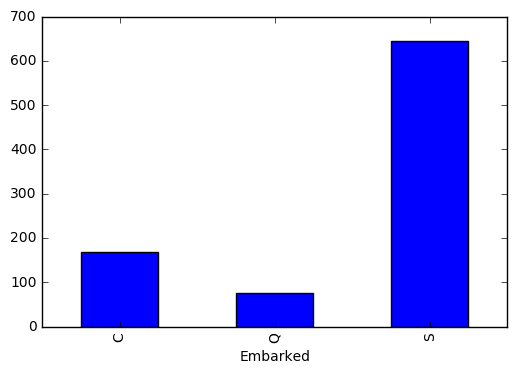

In [9]:
X.groupby('Embarked')['PassengerId'].count().plot.bar()

Since most people embarked at Southampton, I'll just consider the NAs as 'S'. <br />
However, I saw a Kaggler boxplotting the Fare by Pclass and Embarked concluding that the NAs could be 'C'.

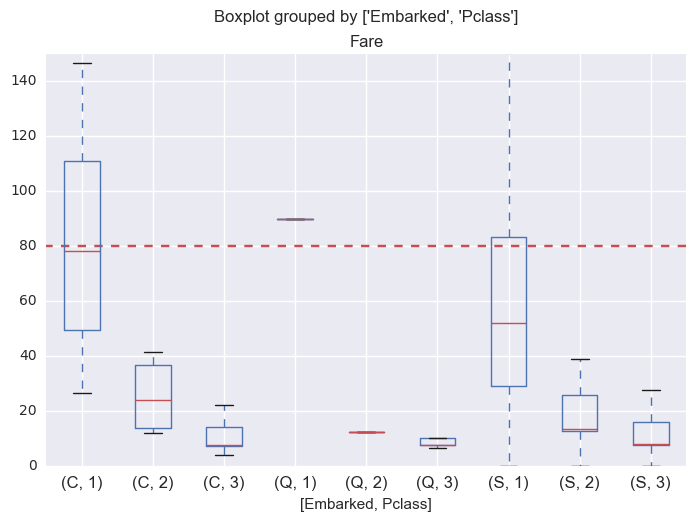

In [65]:
ax = X[['Pclass', 'Embarked', 'Fare']].boxplot(by=['Embarked','Pclass'])
ax.set_ylim(0,150)
ax.hlines(80, 0, 10, color='r', linestyles='dashed')

In [56]:
X[ pd.isnull(X['Embarked']) ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [33]:
from pandas.tools.plotting import andrews_curves

TypeError: unsupported operand type(s) for /: 'str' and 'float'

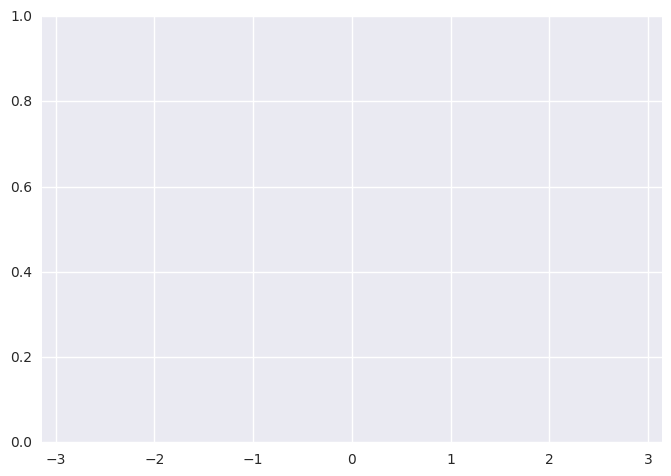

In [38]:
andrews_curves(train[['Fare', 'Embarked']], 'Fare')

In [11]:
#from sklearn.ensemble import RandomForestClassifier

In [12]:
#forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [15]:
#forest.fit(X,y)

Primeiro vou agrupar por Sexo e Sobreviveu a fim de mostrar o quanto que 

In [16]:
bySexSurvived = train.groupby(['Sex','Survived']).count().unstack()
bySexSurvived = bySexSurvived['PassengerId']
print bySexSurvived
bySexSurvived.plot.bar(color=['red', 'blue'])
#['PassengerId'].plot.bar(color=['red','blue'])

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-16-a41fd37a6153>, line 3)

In [17]:
sns.set(color_codes=True)

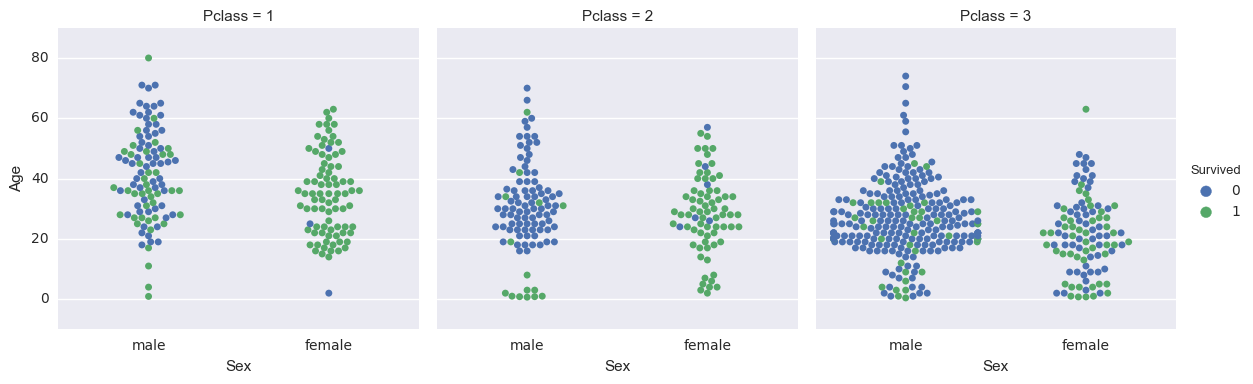

In [18]:
sns.factorplot(data=train, x='Sex', y='Age', kind='swarm', hue='Survived', col='Pclass')

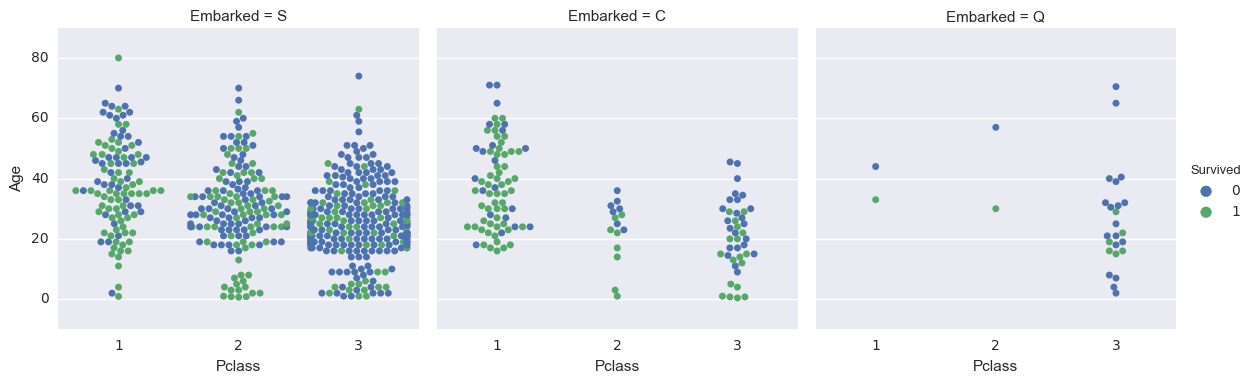

In [19]:
sns.factorplot(data=train, x='Pclass', y='Age', kind='swarm', hue='Survived', col='Embarked')

In [20]:
criterion = train['Embarked'].map(lambda x : x == 'Q')

In [21]:
train[criterion & (train.Pclass == 1) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


In [22]:
train[train.Name.map(lambda x : x.startswith('Mina'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


In [23]:
test[test.Name.map(lambda x : x.startswith('Mina'))]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0,C78,Q


In [24]:
x = train.groupby(['Ticket','Survived']).count()['PassengerId']

In [25]:
x

Ticket             Survived
110152             1           3
110413             0           1
                   1           2
110465             0           2
110564             1           1
110813             1           1
111240             0           1
111320             0           1
111361             1           2
111369             1           1
111426             1           1
111427             1           1
111428             1           1
112050             0           1
112052             0           1
112053             1           1
112058             0           1
112059             0           1
112277             1           1
112379             0           1
113028             0           1
113043             0           1
113050             0           1
113051             0           1
113055             1           1
113056             0           1
113059             0           1
113501             0           1
113503             0           1
113505         